In [16]:
import os
import re
import pandas as pd
import numpy as np

# Ophsy model

### 1. Raw model
Using all neurons, all 28 frames, one model per region

In [67]:
all_model_path = ".\\model"
models = os.listdir(all_model_path)
all_data = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"([a-zA-Z]+)_\d+_\d+_([a-zA-Z]+)", model_name)
    if (match == None):
        continue
    region = match[1]
    if (all_data.get(region, None) == None):
        all_data[region] = {}
    model_name = match[2]
    logfile = os.path.join(model_path, "training.log")
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[region][model_name] = val_acc
df = pd.DataFrame.from_dict(all_data)
print(df.head())
df.to_csv("20220415_result.csv")
    # print(model_name, train_acc, val_acc)

        VISal     VISam      VISl     VISpm      VISp     VISrl
CNN  0.118644  0.003390  0.936441  0.197458  0.775424  0.050000
DNN  0.118644  0.210169  0.479661  0.162712  0.360170  0.029661
SNN  0.136441  0.282203  0.667797  0.158475  0.492373  0.046610


### 2. High Response Neuron model
Filtered out High Response Neurons (df/f > 0.01), using all neurons, all 28 frames, one model per region

In [11]:
all_model_path = ".\\model"
models = os.listdir(all_model_path)
all_data = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"high_response_([a-zA-Z]+)_([a-zA-Z]+)", model_name)
    if (match == None):
        continue
    region = match[1]
    if (all_data.get(region, None) == None):
        all_data[region] = {}
    model_name = match[2]
    logfile = os.path.join(model_path, "training.log")
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[region][model_name] = val_acc
df = pd.DataFrame.from_dict(all_data)
print(df.head())
df.to_csv("20220606_high_response_ophsy.csv")

        VISal     VISam      VISl     VISpm      VISp     VISrl
CNN  0.491525  0.286441  0.582203  0.396610  0.144068  0.021186
DNN  0.471186  0.272881  0.542373  0.407627  0.197458  0.019492
SNN  0.583898  0.332203  0.896610  0.572881  0.921186  0.050847


### 3A. High Response Neuron model, frame-by-frame models
Filtered out High Response Neurons (df/f > 0.01). One model per frame, therefore 28 models per region

In [46]:
all_model_path = ".\\model"
models = os.listdir(all_model_path)
all_data = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"high_response_(\w+)_(\d+)_(\w+)", model_name)
    if (match == None):
        continue
    region = match[1]
    if (all_data.get(region, None) == None):
        all_data[region] = {}
    frame_num = int(match[2])
    model_name = match[3]
    logfile = os.path.join(model_path, "training.log")
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[region][(frame_num, model_name)] = val_acc
# all_data['VISp']

df = pd.DataFrame.from_dict(all_data)
df.index
regions = df.columns
for region in regions:
    df_region = df.loc[:, region]
    df_region = df_region.unstack()
    # print(df_region)
    df_region.to_csv(f"20220610_high_response_ophsy_{region}.csv")


In [33]:
all_model_path = ".\\model"
models = os.listdir(all_model_path)
all_data = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"high_response_(\w+)_(\d+)_794neurons_(\w+)", model_name)
    if (match == None):
        continue
    region = match[1]
    if (all_data.get(region, None) == None):
        all_data[region] = {}
    frame_num = int(match[2])
    model_name = match[3]
    logfile = os.path.join(model_path, "training.log")
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[region][(frame_num, model_name)] = val_acc
# all_data['VISp']

df = pd.DataFrame.from_dict(all_data)
print(df)
print(df.index)
regions = df.columns
for region in regions:
    df_region = df.loc[:, region]
    df_region = df_region.unstack()
    # print(df_region)
    df_region.to_csv(f"20220614_high_response_ophsy_794_neurons_{region}.csv")


           VISal     VISam      VISl     VISpm      VISp     VISrl
0  CNN  0.011864  0.006780  0.006780  0.015254  0.010169  0.006780
   DNN  0.011017  0.008475  0.007627  0.002542  0.005932  0.005085
   SNN  0.015254  0.004237  0.011864  0.011017  0.015254  0.005932
10 CNN  0.061017  0.022881  0.049153  0.044915  0.053390  0.022034
   DNN  0.058475  0.025424  0.058475  0.052542  0.055085  0.019492
...          ...       ...       ...       ...       ...       ...
8  DNN  0.018644  0.023729  0.014407  0.029661  0.019492  0.019492
   SNN  0.017797  0.024576  0.014407  0.031356  0.014407  0.018644
9  CNN  0.030508  0.022881  0.017797  0.050847  0.028814  0.022034
   DNN  0.018644  0.016102  0.012712  0.036441  0.020339  0.028814
   SNN  0.027119  0.011017  0.010169  0.033051  0.017797  0.026271

[84 rows x 6 columns]
MultiIndex([( 0, 'CNN'),
            ( 0, 'DNN'),
            ( 0, 'SNN'),
            (10, 'CNN'),
            (10, 'DNN'),
            (10, 'SNN'),
            (11, 'CNN')

### 4. High response Neuron, accuracy function of number of neurons, frame-by-frame models

Filtered out High Response Neurons (df/f > 0.01).

Accuracy function of number of neurons

One model per frame, therefore 28 models per region

In [26]:
all_model_path = ".\\model"
models = os.listdir(all_model_path)
all_data = {}
best_frame = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"high_response_(\w+)_(\d+)_(\d+)neurons_(\w+)", model_name)
    if (match == None):
        continue
    region = match[1]
    if (all_data.get(region, None) == None):
        all_data[region] = {}
    frame_num = int(match[2])
    best_frame[region] = frame_num
    neuron_num = int(match[3])
    model_name = match[4]
    logfile = os.path.join(model_path, "training.log")
    # print(region, frame_num, neuron_num, model_name)
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    # d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[region][(neuron_num, model_name)] = val_acc
# all_data['VISp']

df = pd.DataFrame.from_dict(all_data)
df.index
regions = df.columns
for region in regions:
    df_region = df.loc[:, region]
    df_region = df_region.unstack()
    print(region, df_region)
    df_region.to_csv(f"20220612_high_response_ophsy_num_neuron_population_{region}.csv")

VISal            DNN
50    0.077119
100   0.082203
150   0.138983
200   0.211864
250   0.244068
...        ...
9250       NaN
9300       NaN
9350       NaN
9400       NaN
9441       NaN

[194 rows x 1 columns]
VISam            DNN
50    0.061864
100   0.116949
150   0.127119
200   0.157627
250   0.168644
...        ...
9250       NaN
9300       NaN
9350       NaN
9400       NaN
9441       NaN

[194 rows x 1 columns]
VISl            DNN
50    0.135593
100   0.176271
150   0.310169
200   0.314407
250   0.392373
...        ...
9250       NaN
9300       NaN
9350       NaN
9400       NaN
9441       NaN

[194 rows x 1 columns]
VISpm            DNN
50    0.069492
100   0.100847
150   0.126271
200   0.166102
250   0.198305
...        ...
9250       NaN
9300       NaN
9350       NaN
9400       NaN
9441       NaN

[194 rows x 1 columns]
VISp            DNN
50    0.085593
100   0.156780
150   0.229661
200   0.251695
250   0.288136
...        ...
9250  0.970339
9300  0.971186
9350  0.974576
9400  

### 4. Ephsy

# All models

In [63]:
# VISp (5900, 26, 409)
# VISal (5900, 26, 248)
# VISam (5900, 26, 215)
# VISl (5900, 26, 299)
# VISpm (5900, 26, 272)
# VISrl (5900, 26, 474)


all_model_path = ".\\ephsy_model"
models = os.listdir(all_model_path)
all_data = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"(\w+)_\d_([A-Z]+)", model_name)
    if (match == None):
        continue
    # print(model_name, match[1], match[2])
    logfile = os.path.join(model_path, "training.log")
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[(match[1], match[2])] = d
df = pd.DataFrame.from_dict(all_data)
df.head()
df.to_csv("20220415_ephsy_result.csv")
    # print(model_name, train_acc, val_acc)

### Frame-by-frame models

In [66]:
all_model_path = ".\\ephsy_model"
models = os.listdir(all_model_path)
all_data = {}
best_frame = {}
for model_name in models:
    model_path = os.path.join(all_model_path, model_name)
    match = re.match(r"(\w+)_\d+_frame(\d+)_(\w+)", model_name)
    if (match == None):
        continue
    region = match[1]
    if (all_data.get(region, None) == None):
        all_data[region] = {}
    frame_num = int(match[2])
    best_frame[region] = frame_num
    model_name = match[3]
    logfile = os.path.join(model_path, "training.log")
    # print(region, frame_num, neuron_num, model_name)
    df = pd.read_csv(logfile)
    train_acc, val_acc = df.iloc[-1]['accuracy'], df.iloc[-1]['val_accuracy']
    # d = {"model_name":model_name, "acc":train_acc, "val_acc":val_acc}
    all_data[region][(frame_num, model_name)] = val_acc
# all_data['VISp']

df = pd.DataFrame.from_dict(all_data)
df.index
regions = df.columns
for region in regions:
    df_region = df.loc[:, region]
    df_region = df_region.unstack()
    print(region, df_region)
    df_region.to_csv(f"20220614_ephsy_{region}.csv")

VISal          CNN       DNN       SNN
0   0.007627  0.005085  0.006780
1   0.026271  0.023729  0.025424
2   0.188983  0.153390  0.182203
3   0.323729  0.303390  0.338136
4   0.319492  0.283898  0.355932
5   0.270339  0.260170  0.305085
6   0.228814  0.226271  0.272034
7   0.201695  0.173729  0.200847
8   0.182203  0.161017  0.187288
9   0.153390  0.153390  0.180508
10  0.125424  0.110169  0.148305
11  0.041525  0.041525  0.054237
12  0.029661  0.021186  0.027966
13  0.022881  0.014407  0.018644
14  0.019492  0.013559  0.010169
15  0.008475  0.007627  0.013559
16  0.012712  0.006780  0.010169
17  0.007627  0.008475  0.006780
18  0.011017  0.005085  0.006780
19  0.009322  0.003390  0.009322
20  0.009322  0.002542  0.011017
21  0.007627  0.009322  0.008475
22  0.011864  0.004237  0.010169
23  0.011864  0.011017  0.006780
24  0.009322  0.007627  0.004237
25  0.002542  0.005932  0.004237
VISam          CNN       DNN       SNN
0   0.006780  0.005085  0.013559
1   0.010169  0.008475  0.00678

### Plotting
##### A. Ophsy
1. Figure A, Figure C
2. Figure D, Figure F (add horizontal line)



In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("seaborn-dark")
import pickle

In [2]:
# regions = ['VISp', 'VISal', 'VISl', 'VISpm', 'VISam', 'VISrl']

# print("Region: Neuron Number")
# for region in regions:
#     data_filename = f"dff_trace_high_response_{region}.pkl"
#     with open(data_filename, "rb") as f:
#         data = pickle.load(f)
#     num_neurons = data.shape[1]
    
#     print(f"{region}: {num_neurons}")

In [6]:
num_high_response_neurons = {"VISp": 9441, "VISal": 2064, "VISl": 4762, "VISpm": 2026, "VISam": 794, "VISrl": 1320}

def get_dataframe_A():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['CNN', 'DNN', 'SNN']
    data = []
    for region in regions:
        df_region = pd.read_csv(f"20220610_high_response_ophsy_{region}.csv")
        q = [region + f"\n({num_high_response_neurons[region]})"]
        for model in models:
            acc = df_region[model].max()
            q.append(acc)
        data.append(q)
    df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    df = df.set_index('Region')
    return df

def get_dataframe_B():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['SNN', 'DNN', 'CNN']
    data = {}
    for region in regions:
        df_region = pd.read_csv(f"20220610_high_response_ophsy_{region}.csv", index_col = 0)
        # q = [region + f"\n({num_high_response_neurons[region]})"]
        data[region] = df_region
    # df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    # df = df.set_index('Region')
    return data

def get_dataframe_C():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['CNN', 'DNN', 'SNN']
    data = []
    for region in regions:
        df_region = pd.read_csv(f"20220614_high_response_ophsy_794_neurons_{region}.csv")
        q = [region + f"\n794)"]
        for model in models:
            acc = df_region[model].max()
            q.append(acc)
        data.append(q)
    df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    df = df.set_index('Region')
    return df

def get_dataframe_D():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['SNN', 'DNN', 'CNN']
    data = {}
    for region in regions:
        df_region = pd.read_csv(f"20220614_high_response_ophsy_794_neurons_{region}.csv", index_col = 0)
        # q = [region + f"\n({num_high_response_neurons[region]})"]
        data[region] = df_region
    # df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    # df = df.set_index('Region')
    return data

# get_dataframe_A()
# get_dataframe_B()
# get_dataframe_C()
get_dataframe_D()

{'VISal':          CNN       DNN       SNN
 0   0.011864  0.011017  0.015254
 1   0.010169  0.005932  0.007627
 2   0.009322  0.012712  0.012712
 3   0.008475  0.007627  0.005085
 4   0.011864  0.013559  0.011864
 5   0.006780  0.005932  0.011017
 6   0.011864  0.005085  0.008475
 7   0.011017  0.005085  0.009322
 8   0.016949  0.018644  0.017797
 9   0.030508  0.018644  0.027119
 10  0.061017  0.058475  0.080508
 11  0.185593  0.209322  0.261017
 12  0.320339  0.376271  0.412712
 13  0.440678  0.464407  0.521186
 14  0.469492  0.511017  0.539831
 15  0.425424  0.478814  0.548305
 16  0.405932  0.455932  0.507627
 17  0.392373  0.405085  0.466102
 18  0.305932  0.333898  0.395763
 19  0.244068  0.255932  0.316949
 20  0.201695  0.185593  0.249153
 21  0.129661  0.126271  0.159322
 22  0.085593  0.088983  0.125424
 23  0.076271  0.073729  0.105085
 24  0.061864  0.055932  0.080508
 25  0.043220  0.036441  0.064407
 26  0.038983  0.024576  0.044068
 27  0.032203  0.028814  0.036441,
 'VI

(0.0, 1.0)

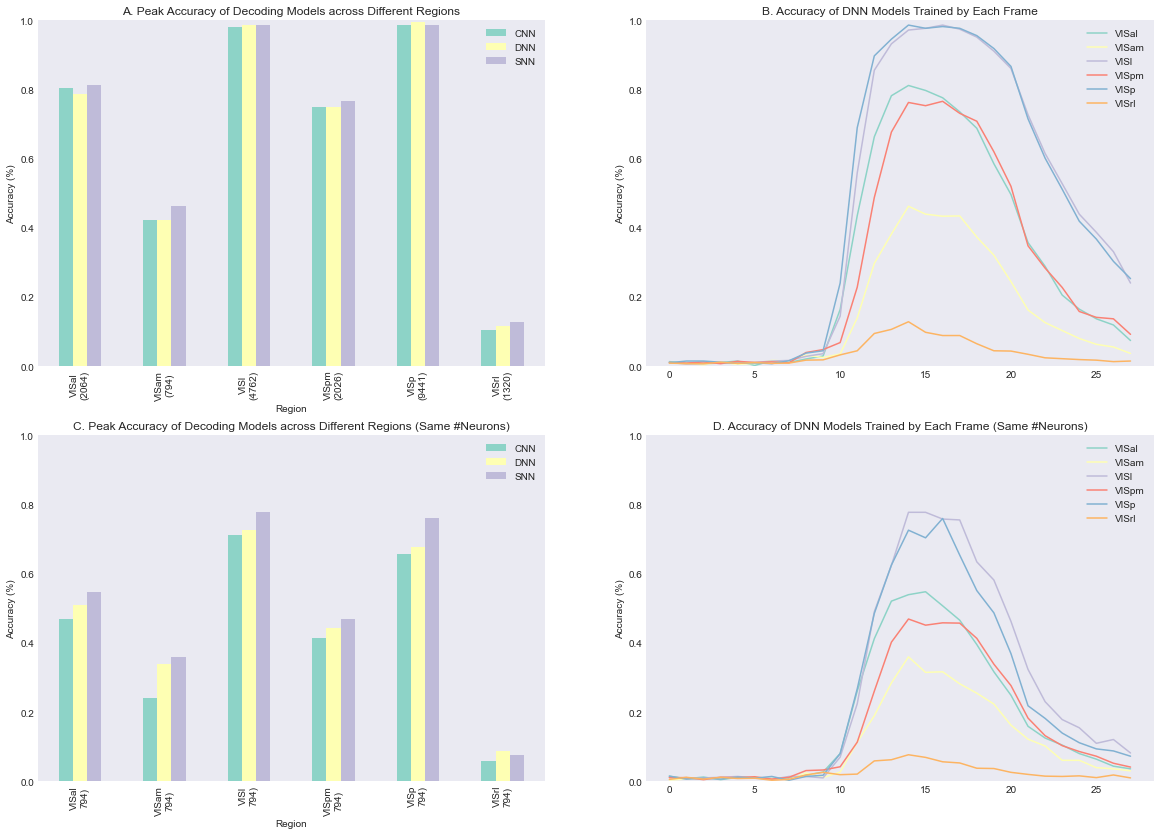

In [7]:
fig, ((ax_bar_all, ax_frame_all), (ax_bar_same, ax_frame_same)) = plt.subplots(2, 2, figsize=(20, 14))
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
# matplotlib.rc('font', **font)
# 1
df_A = get_dataframe_A()
df_A.plot(kind="bar", ax = ax_bar_all)
ax_bar_all.set_title("A. Peak Accuracy of Decoding Models across Different Regions")
ax_bar_all.set_ylabel("Accuracy (%)") 
ax_bar_all.set_ylim(0, 1)


dict_df_B = get_dataframe_B()
for region, df in dict_df_B.items():
    # print(region, df)
    df['SNN'].plot(kind="line", ax = ax_frame_all)
ax_frame_all.legend(dict_df_B.keys())
ax_frame_all.set_title("B. Accuracy of DNN Models Trained by Each Frame")
ax_frame_all.set_ylabel("Accuracy (%)") 
ax_frame_all.set_ylim(0, 1)



df_C = get_dataframe_C()
df_C.plot(kind="bar", ax = ax_bar_same)
ax_bar_same.set_title("C. Peak Accuracy of Decoding Models across Different Regions (Same #Neurons)")
ax_bar_same.set_ylabel("Accuracy (%)") 
ax_bar_same.set_ylim(0, 1)


dict_df_D = get_dataframe_D()
for region, df in dict_df_D.items():
    # print(region, df)
    df['SNN'].plot(kind="line", ax = ax_frame_same)
ax_frame_same.legend(dict_df_D.keys())
ax_frame_same.set_title("D. Accuracy of DNN Models Trained by Each Frame (Same #Neurons)")
ax_frame_same.set_ylabel("Accuracy (%)") 
ax_frame_same.set_ylim(0, 1)

# TODO: 加竖线，分出Frame

In [8]:
def get_dataframe_neuronal():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    # models = ['SNN', 'DNN', 'CNN']
    data = None
    for region in regions:
        df_region = pd.read_csv(f"20220612_high_response_ophsy_num_neuron_population_{region}.csv", index_col = 0)
        # q = [region + f"\n({num_high_response_neurons[region]})"]
        if (type(data) is type(None)):
            data = df_region
            data = data.rename(columns={"DNN":region})
        else:
            data[region] = df_region
    print(data)
    return data

         VISal     VISam      VISl     VISpm      VISp     VISrl
50    0.077119  0.061864  0.135593  0.069492  0.085593  0.025424
100   0.082203  0.116949  0.176271  0.100847  0.156780  0.017797
150   0.138983  0.127119  0.310169  0.126271  0.229661  0.036441
200   0.211864  0.157627  0.314407  0.166102  0.251695  0.041525
250   0.244068  0.168644  0.392373  0.198305  0.288136  0.034746
...        ...       ...       ...       ...       ...       ...
9250       NaN       NaN       NaN       NaN  0.970339       NaN
9300       NaN       NaN       NaN       NaN  0.971186       NaN
9350       NaN       NaN       NaN       NaN  0.974576       NaN
9400       NaN       NaN       NaN       NaN  0.967797       NaN
9441       NaN       NaN       NaN       NaN  0.973729       NaN

[194 rows x 6 columns]


Text(0.5, 1.0, 'Neural Decoding Accuracy as the Function of Neural Population Size')

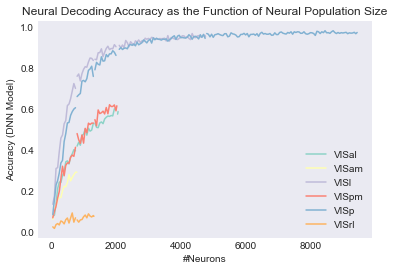

In [9]:
df_C = get_dataframe_neuronal()
df_C.plot(kind="line")
plt.xlabel("#Neurons")
plt.ylabel("Accuracy (DNN Model)")
plt.title("Neural Decoding Accuracy as the Function of Neural Population Size")

## Effect of Preprocessing
- High Mean Response v.s. All Neurons
- Single Frame v.s. All Frames


Text(0, 0.5, 'Accuracy')

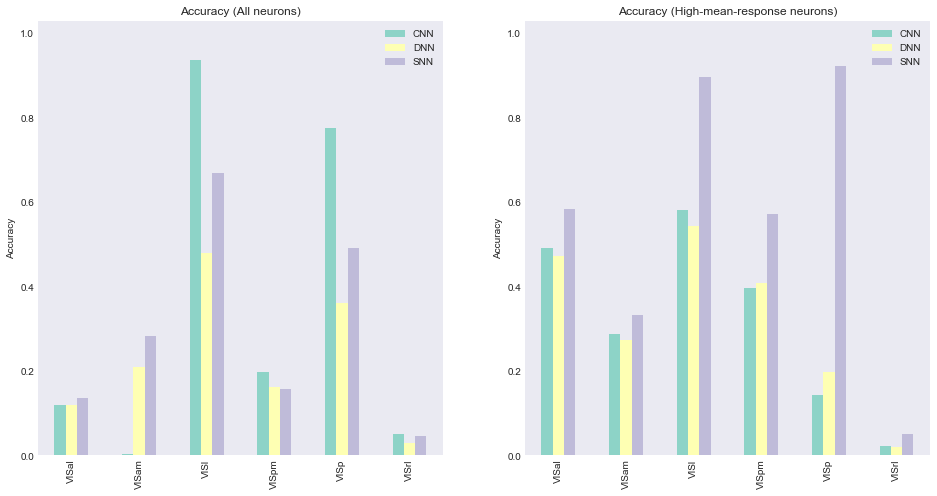

In [10]:
# (1) hmr v.s. all neuron TODO: 晚上把数据再跑一组
df_nonhmr = pd.read_csv("20220415_result.csv", index_col=0)
df_hmr = pd.read_csv(f"20220606_high_response_ophsy.csv", index_col=0)
fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (16, 8))
df_nonhmr.T.plot(kind="bar", ax=ax1)
df_hmr.T.plot(kind="bar", ax=ax2)
ax1.set_ylim(0, 1.03)
ax2.set_ylim(0, 1.03)
ax1.set_title("Accuracy (All neurons)")
ax2.set_title("Accuracy (High-mean-response neurons)")
ax1.set_ylabel("Accuracy")
ax2.set_ylabel("Accuracy")



Text(0.5, 0.98, 'DNN Model Accuracy Comparison: Whole Dataset Model (left) v.s. Frame-wise Model (right)')

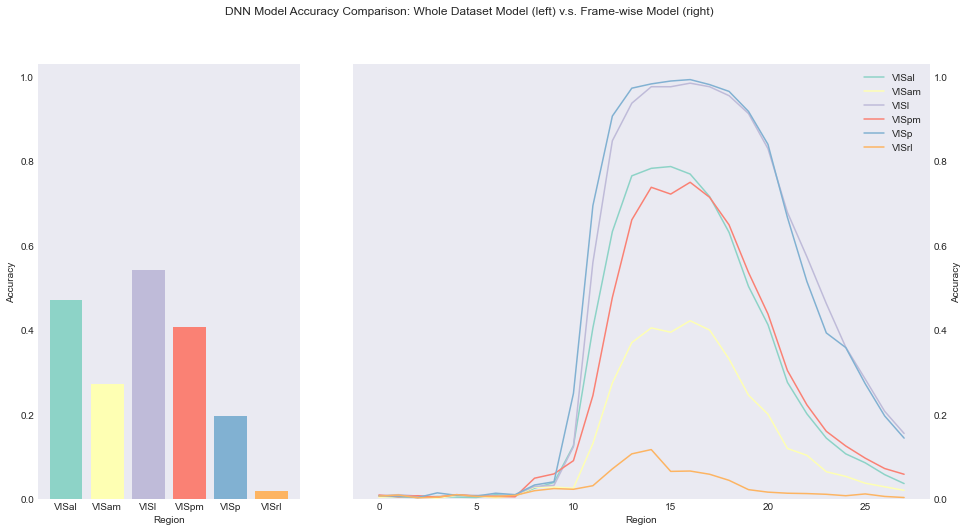

In [11]:


# (2) Single Frame v.s. All Frames

fig = plt.figure(figsize = (16, 8))
gs = fig.add_gridspec(1,3)
ax_all = fig.add_subplot(gs[0, 0])
ax_frame = fig.add_subplot(gs[0, 1:])


dict_df_B = get_dataframe_B()
df_whole = pd.read_csv(f"20220606_high_response_ophsy.csv", index_col=0)

for region, df in dict_df_B.items():
    ax_all.bar(region, df_whole.loc['DNN', region])
    # print(region, df)
    df['DNN'].plot(kind="line", ax = ax_frame)
ax_all.set_ylim(0, 1.03)
ax_all.set_ylabel("Accuracy")
ax_all.spines['top'].set_visible(False)
# ax_all.spines['left'].set_visible(False)
ax_all.spines['right'].set_visible(False)
ax_all.set_xlabel("Region")


ax_frame.set_xlabel("Region")
ax_frame.set_ylim(0, 1.03)
ax_frame.set_ylabel("Accuracy")
ax_frame.yaxis.set_ticks_position("right")
ax_frame.yaxis.set_label_position("right")
ax_frame.spines['top'].set_visible(False)
ax_frame.spines['left'].set_visible(False)
# ax_frame.spines['right'].set_visible(False)

ax_frame.legend(dict_df_B.keys())
# plt.set_ylabel("Accuracy (%)") 
# plt.set_ylim(0, 1)
fig.suptitle("DNN Model Accuracy Comparison: Whole Dataset Model (left) v.s. Frame-wise Model (right)")




In [12]:
df_whole = pd.read_csv(f"20220415_result.csv")
df_whole.head()

,Unnamed: 0,VISal,VISam,VISl,VISpm,VISp,VISrl
0,CNN,0.118644,0.003390,0.936441,0.197458,0.775424,0.050000
1,DNN,0.118644,0.210169,0.479661,0.162712,0.360170,0.029661
2,SNN,0.136441,0.282203,0.667797,0.158475,0.492373,0.046610


## Ephsy Models

In [13]:

def get_dataframe_ophsy():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['SNN', 'DNN', 'CNN']
    data = {}
    for region in regions:
        df_region = pd.read_csv(f"20220610_high_response_ophsy_{region}.csv", index_col = 0)
        # q = [region + f"\n({num_high_response_neurons[region]})"]
        data[region] = df_region
    # df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    # df = df.set_index('Region')
    return data

def get_dataframe_ephsy_max():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['CNN', 'DNN', 'SNN']
    data = []
    for region in regions:
        df_region = pd.read_csv(f"20220614_ephsy_{region}.csv")
        q = [region]
        for model in models:
            acc = df_region[model].max()
            q.append(acc)
        data.append(q)
    df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    df = df.set_index('Region')
    return df

def get_dataframe_ephsy_frame():
    regions = ["VISal", "VISam", "VISl", "VISpm", "VISp", "VISrl"]
    models = ['SNN', 'DNN', 'CNN']
    data = {}
    for region in regions:
        df_region = pd.read_csv(f"20220614_ephsy_{region}.csv", index_col = 0)
        # q = [region + f"\n({num_high_response_neurons[region]})"]
        data[region] = df_region
    # df = pd.DataFrame.from_records(data, columns=['Region'] + models)
    # df = df.set_index('Region')
    return data

# get_dataframe_ophsy()
get_dataframe_ephsy_max()
# get_dataframe_ephsy_frame()

,CNN,DNN,SNN
Region,,,
VISal,0.323729,0.303390,0.355932
VISam,0.287288,0.276271,0.322034
VISl,0.580508,0.553390,0.616949
VISpm,0.506780,0.492373,0.555932
VISp,0.649153,0.647458,0.730508
VISrl,0.488983,0.488983,0.518644


(0.0, 1.03)

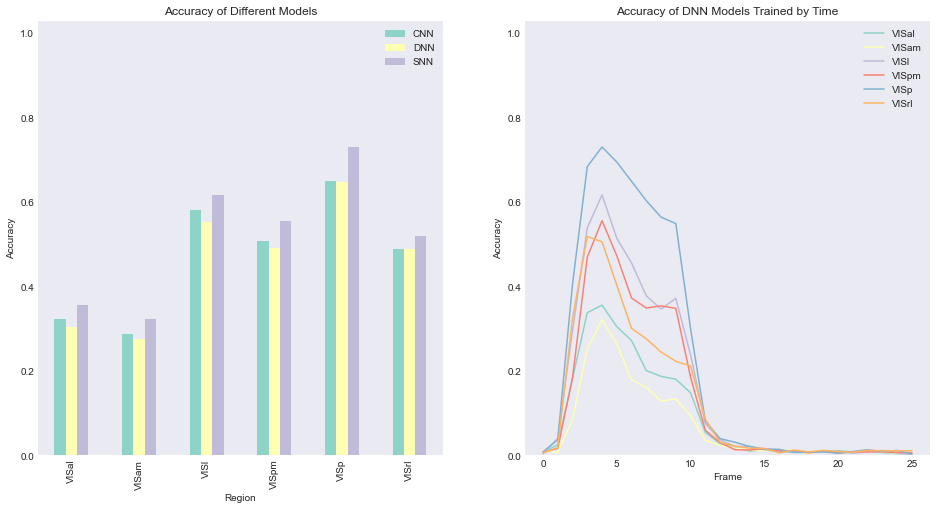

In [14]:
df_ohsy = get_dataframe_ephsy_max()
dict_df_ephsy = get_dataframe_ephsy_frame()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))

df_ohsy.plot(kind="bar", ax = ax1)

for region, df in dict_df_ephsy.items():
    # print(region, df)
    df['SNN'].plot(kind="line", ax = ax2)
ax1.set_ylabel("Accuracy") 
ax1.set_title("Accuracy of Different Models")
ax1.set_ylim(0, 1.03)

ax2.set_xlabel("Frame")
ax2.set_title("Accuracy of DNN Models Trained by Time")
ax2.legend(dict_df_ephsy.keys())
ax2.set_ylabel("Accuracy") 
ax2.set_ylim(0, 1.03)

## Modality Comparison

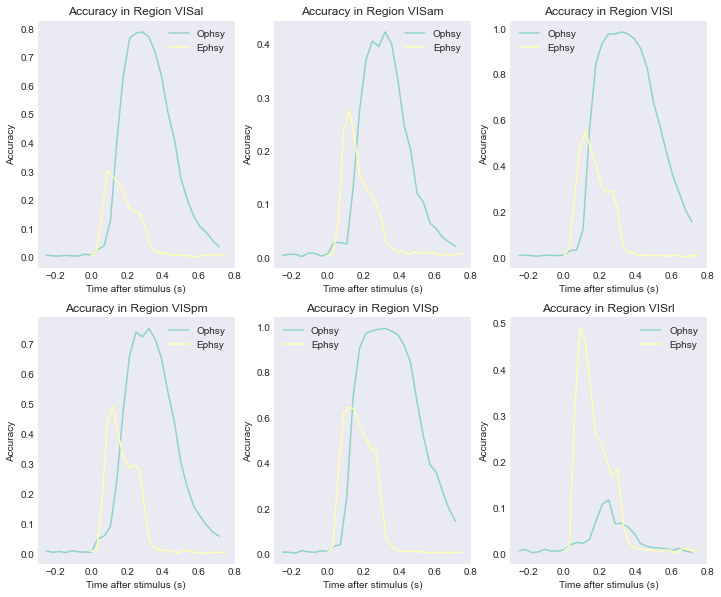

In [17]:
dict_df_ophsy = get_dataframe_B()
dict_df_ephsy = get_dataframe_ephsy_frame()

regions = list(dict_df_ephsy.keys())

ophsy_time = 0.25 / 7
ophsy_x = np.arange(-7 * ophsy_time, 21 * ophsy_time, ophsy_time)
ephsy_time = 0.03
ephsy_x = np.arange(0, 30 * ephsy_time, ephsy_time)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

idx = 0
for region in regions:
    df_ophsy = dict_df_ophsy[region]
    df_ephsy = dict_df_ephsy[region]
    plt.subplot(2, 3, idx + 1)
    plt.plot(ophsy_x, df_ophsy['DNN'])
    plt.plot(ephsy_x[:len(df_ephsy)], df_ephsy['DNN'])
    plt.legend(["Ophsy", "Ephsy"])
    plt.title(f"Accuracy in Region {region}")
    plt.xlabel("Time after stimulus (s)")
    plt.ylabel("Accuracy")
    idx += 1
